In [4]:
%matplotlib inline                                           
import numpy as np
import matplotlib.pyplot as plt                             #用 Pyplot 生成可视化效果

import torch
import torch.optim as optim
import torch.nn as nn

torch.set_printoptions(edgeitems=2, linewidth=75)           #设置打印选项. 从 Numpy 中采集数据

In [5]:
input_t = torch.arange(-3, 3.1, 0.1)                        #返回从-3到3.1, 单位步长为0.1的tensor.
input_t

tensor([-3.0000, -2.9000, -2.8000, -2.7000, -2.6000, -2.5000, -2.4000,
        -2.3000, -2.2000, -2.1000, -2.0000, -1.9000, -1.8000, -1.7000,
        -1.6000, -1.5000, -1.4000, -1.3000, -1.2000, -1.1000, -1.0000,
        -0.9000, -0.8000, -0.7000, -0.6000, -0.5000, -0.4000, -0.3000,
        -0.2000, -0.1000,  0.0000,  0.1000,  0.2000,  0.3000,  0.4000,
         0.5000,  0.6000,  0.7000,  0.8000,  0.9000,  1.0000,  1.1000,
         1.2000,  1.3000,  1.4000,  1.5000,  1.6000,  1.7000,  1.8000,
         1.9000,  2.0000,  2.1000,  2.2000,  2.3000,  2.4000,  2.5000,
         2.6000,  2.7000,  2.8000,  2.9000,  3.0000])

tensor([-0.3000, -0.2900, -0.2800, -0.2700, -0.2600, -0.2500, -0.2400,
        -0.2300, -0.2200, -0.2100, -0.2000, -0.1900, -0.1800, -0.1700,
        -0.1600, -0.1500, -0.1400, -0.1300, -0.1200, -0.1100, -0.1000,
        -0.0900, -0.0800, -0.0700, -0.0600, -0.0500, -0.0400, -0.0300,
        -0.0200, -0.0100,  0.0000,  0.1000,  0.2000,  0.3000,  0.4000,
         0.5000,  0.6000,  0.7000,  0.8000,  0.9000,  1.0000,  1.1000,
         1.2000,  1.3000,  1.4000,  1.5000,  1.6000,  1.7000,  1.8000,
         1.9000,  2.0000,  2.1000,  2.2000,  2.3000,  2.4000,  2.5000,
         2.6000,  2.7000,  2.8000,  2.9000,  3.0000])

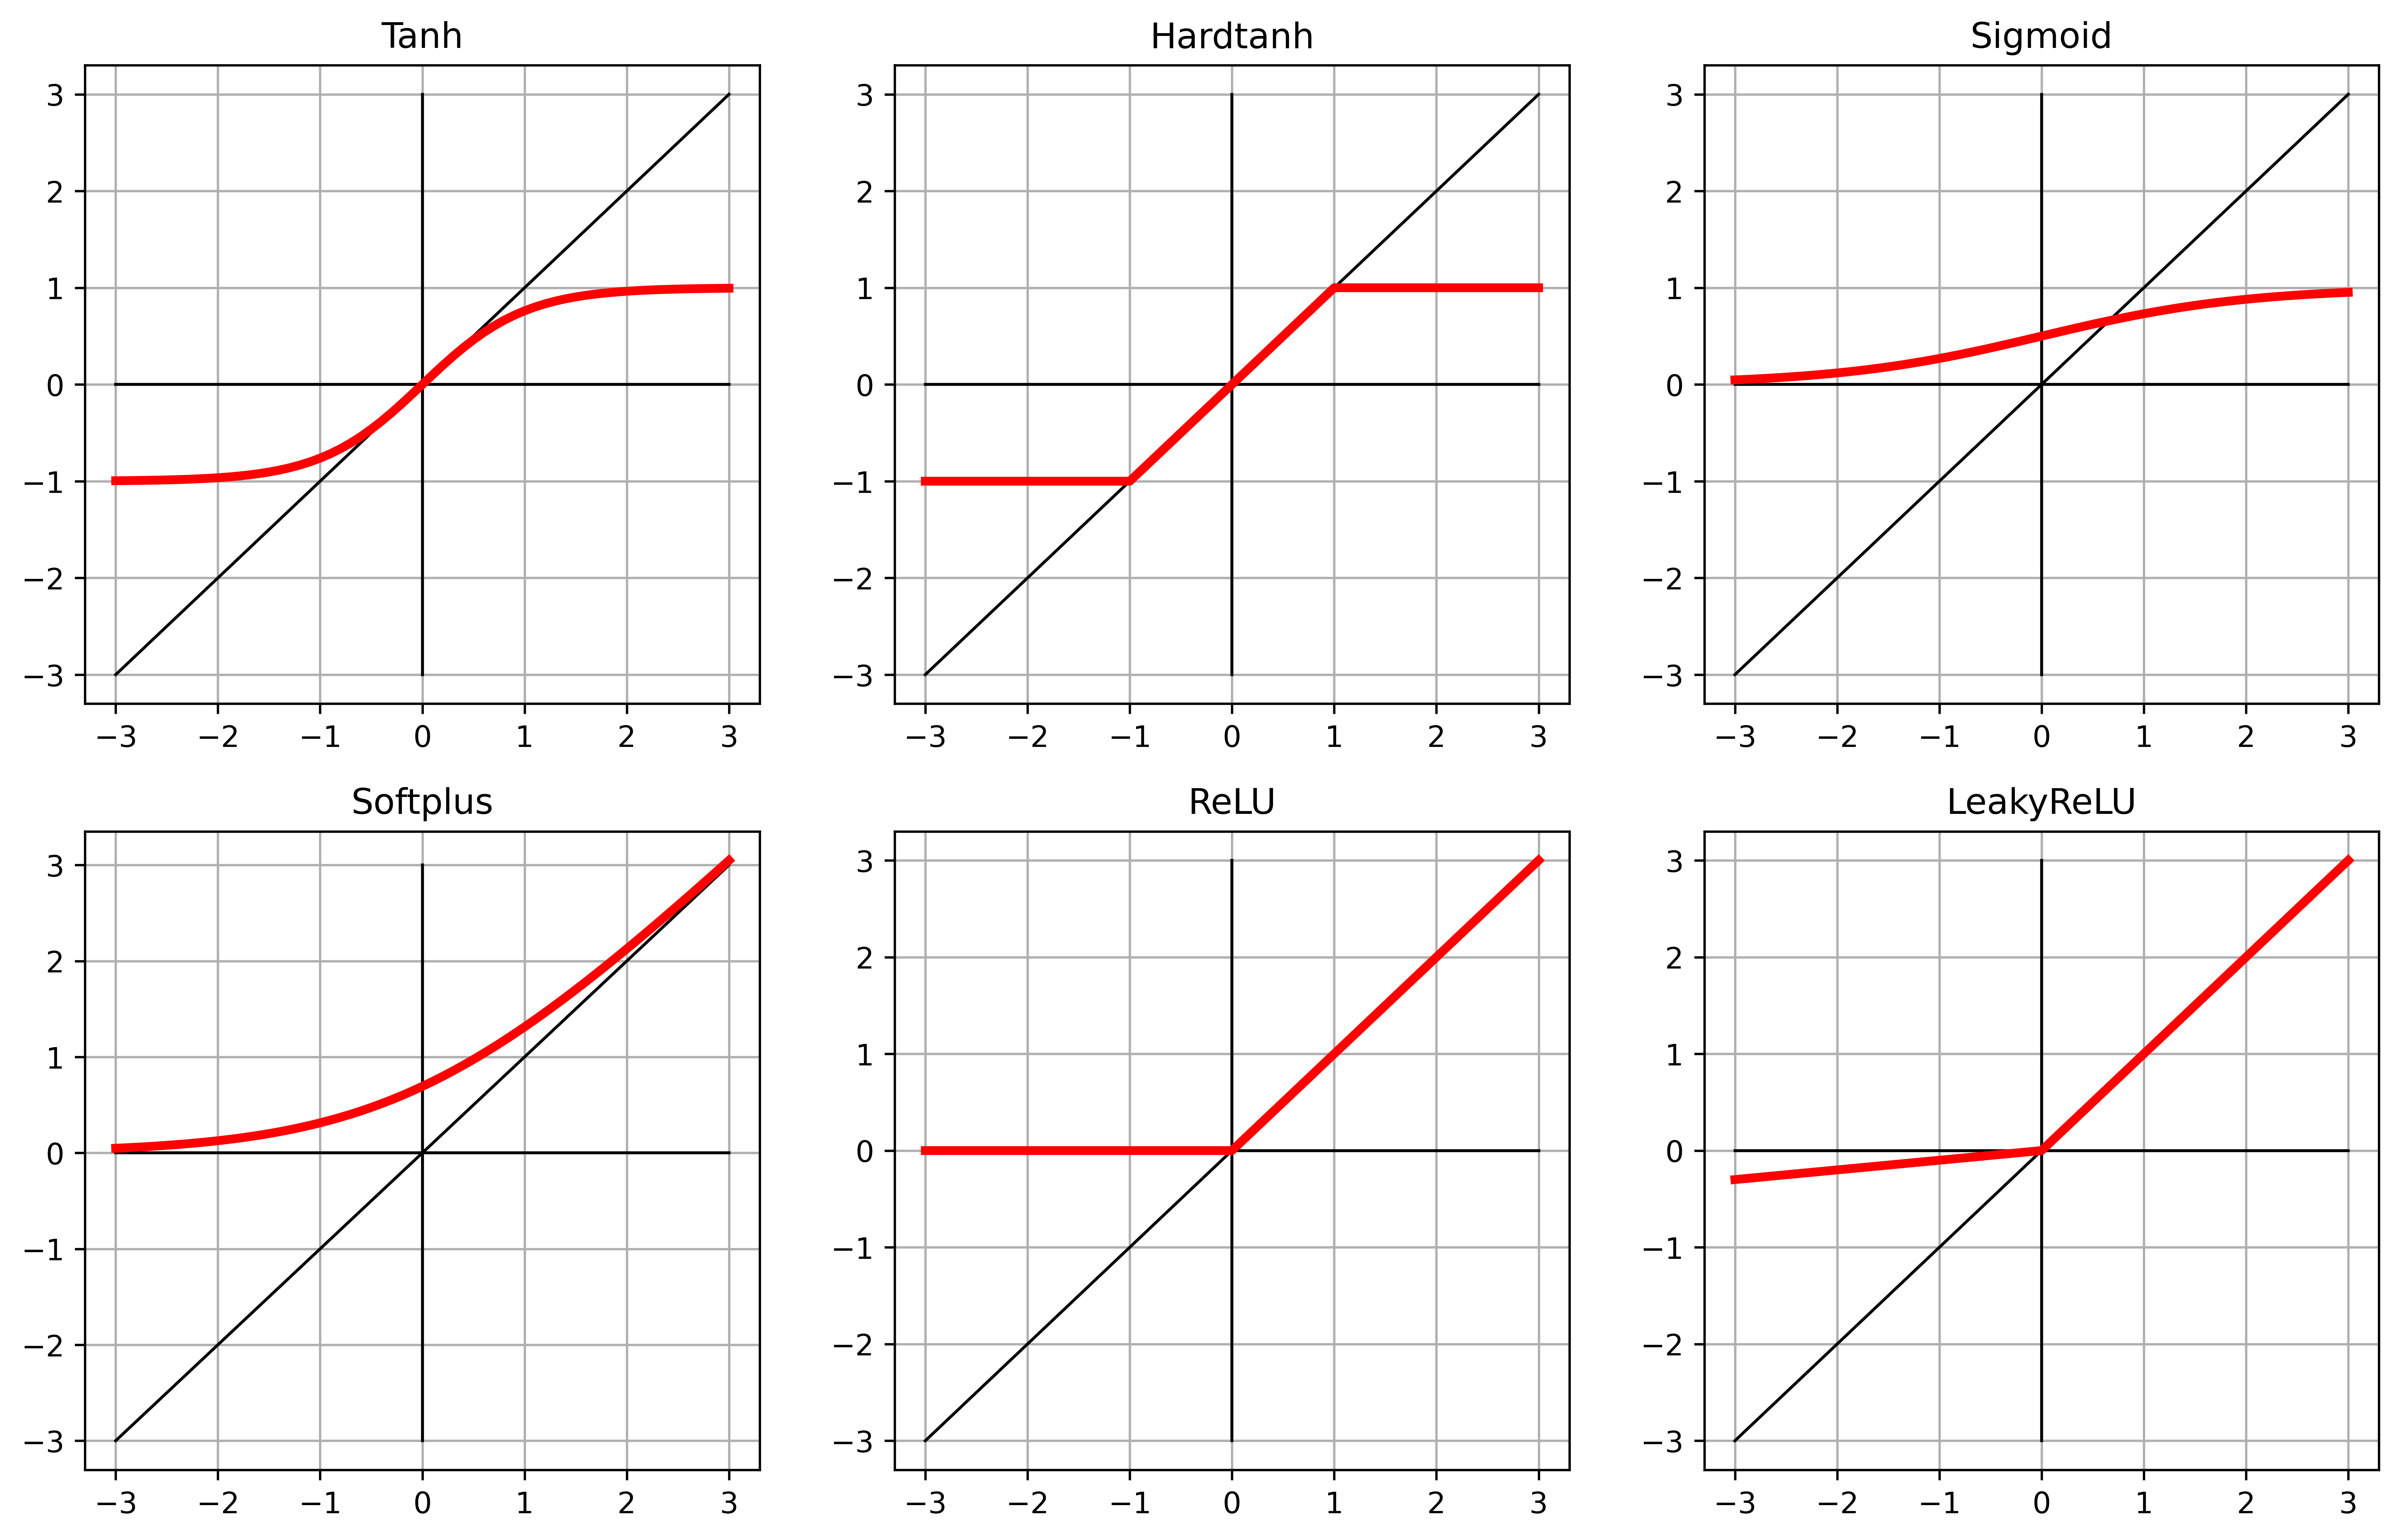

In [14]:
activation_list = [
    nn.Tanh(),
    nn.Hardtanh(),
    nn.Sigmoid(),
    
    nn.Softplus(),
    nn.ReLU(),
    nn.LeakyReLU(negative_slope=0.1),

    
    #nn.Tanhshrink(),
    #nn.Softshrink(),
    #nn.Hardshrink(),
]

fig = plt.figure(figsize=(14, 28), dpi=600)     #figsize设置图形的大小，a为图形的宽,b为图形的高，单位为英寸,dpi为设置图形每英寸的点数        

for i, activation_func in enumerate(activation_list):      #enumerate将其组成一个索引序列，利用它可以同时获得索引和值 
    subplot = fig.add_subplot(len(activation_list), 3, i+1)
    subplot.set_title(type(activation_func).__name__)
    
    output_t = activation_func(input_t)
    
    plt.grid()
    plt.plot(input_t.numpy(), input_t.numpy(),'k', linewidth=1)
    plt.plot([-3,3], [0,0], 'k', linewidth=1)
    plt.plot([0,0], [-3,3], 'k', linewidth=1)
    plt.plot(input_t.numpy(), output_t.numpy(), 'r', linewidth=3)

output_t

tensor([1.6885, 1.6924, 1.6967, 1.7015, 1.7064, 1.7112, 1.7155, 1.7184,
        1.7190, 1.7158, 1.7069, 1.6901, 1.6629, 1.6229, 1.5685, 1.5005,
        1.4238, 1.3486, 1.2913, 1.2713, 1.3060, 1.4017, 1.5384, 1.6643,
        1.7191, 1.6667, 1.5191, 1.3410, 1.2022, 1.1303, 1.1191, 1.1508,
        1.2075, 1.2744, 1.3414, 1.4024, 1.4547, 1.4979, 1.5328, 1.5605,
        1.5824, 1.5997, 1.6132, 1.6239, 1.6324, 1.6391, 1.6444, 1.6487,
        1.6521, 1.6549, 1.6571, 1.6589, 1.6604, 1.6615, 1.6625, 1.6633,
        1.6639, 1.6644, 1.6649, 1.6652, 1.6655])

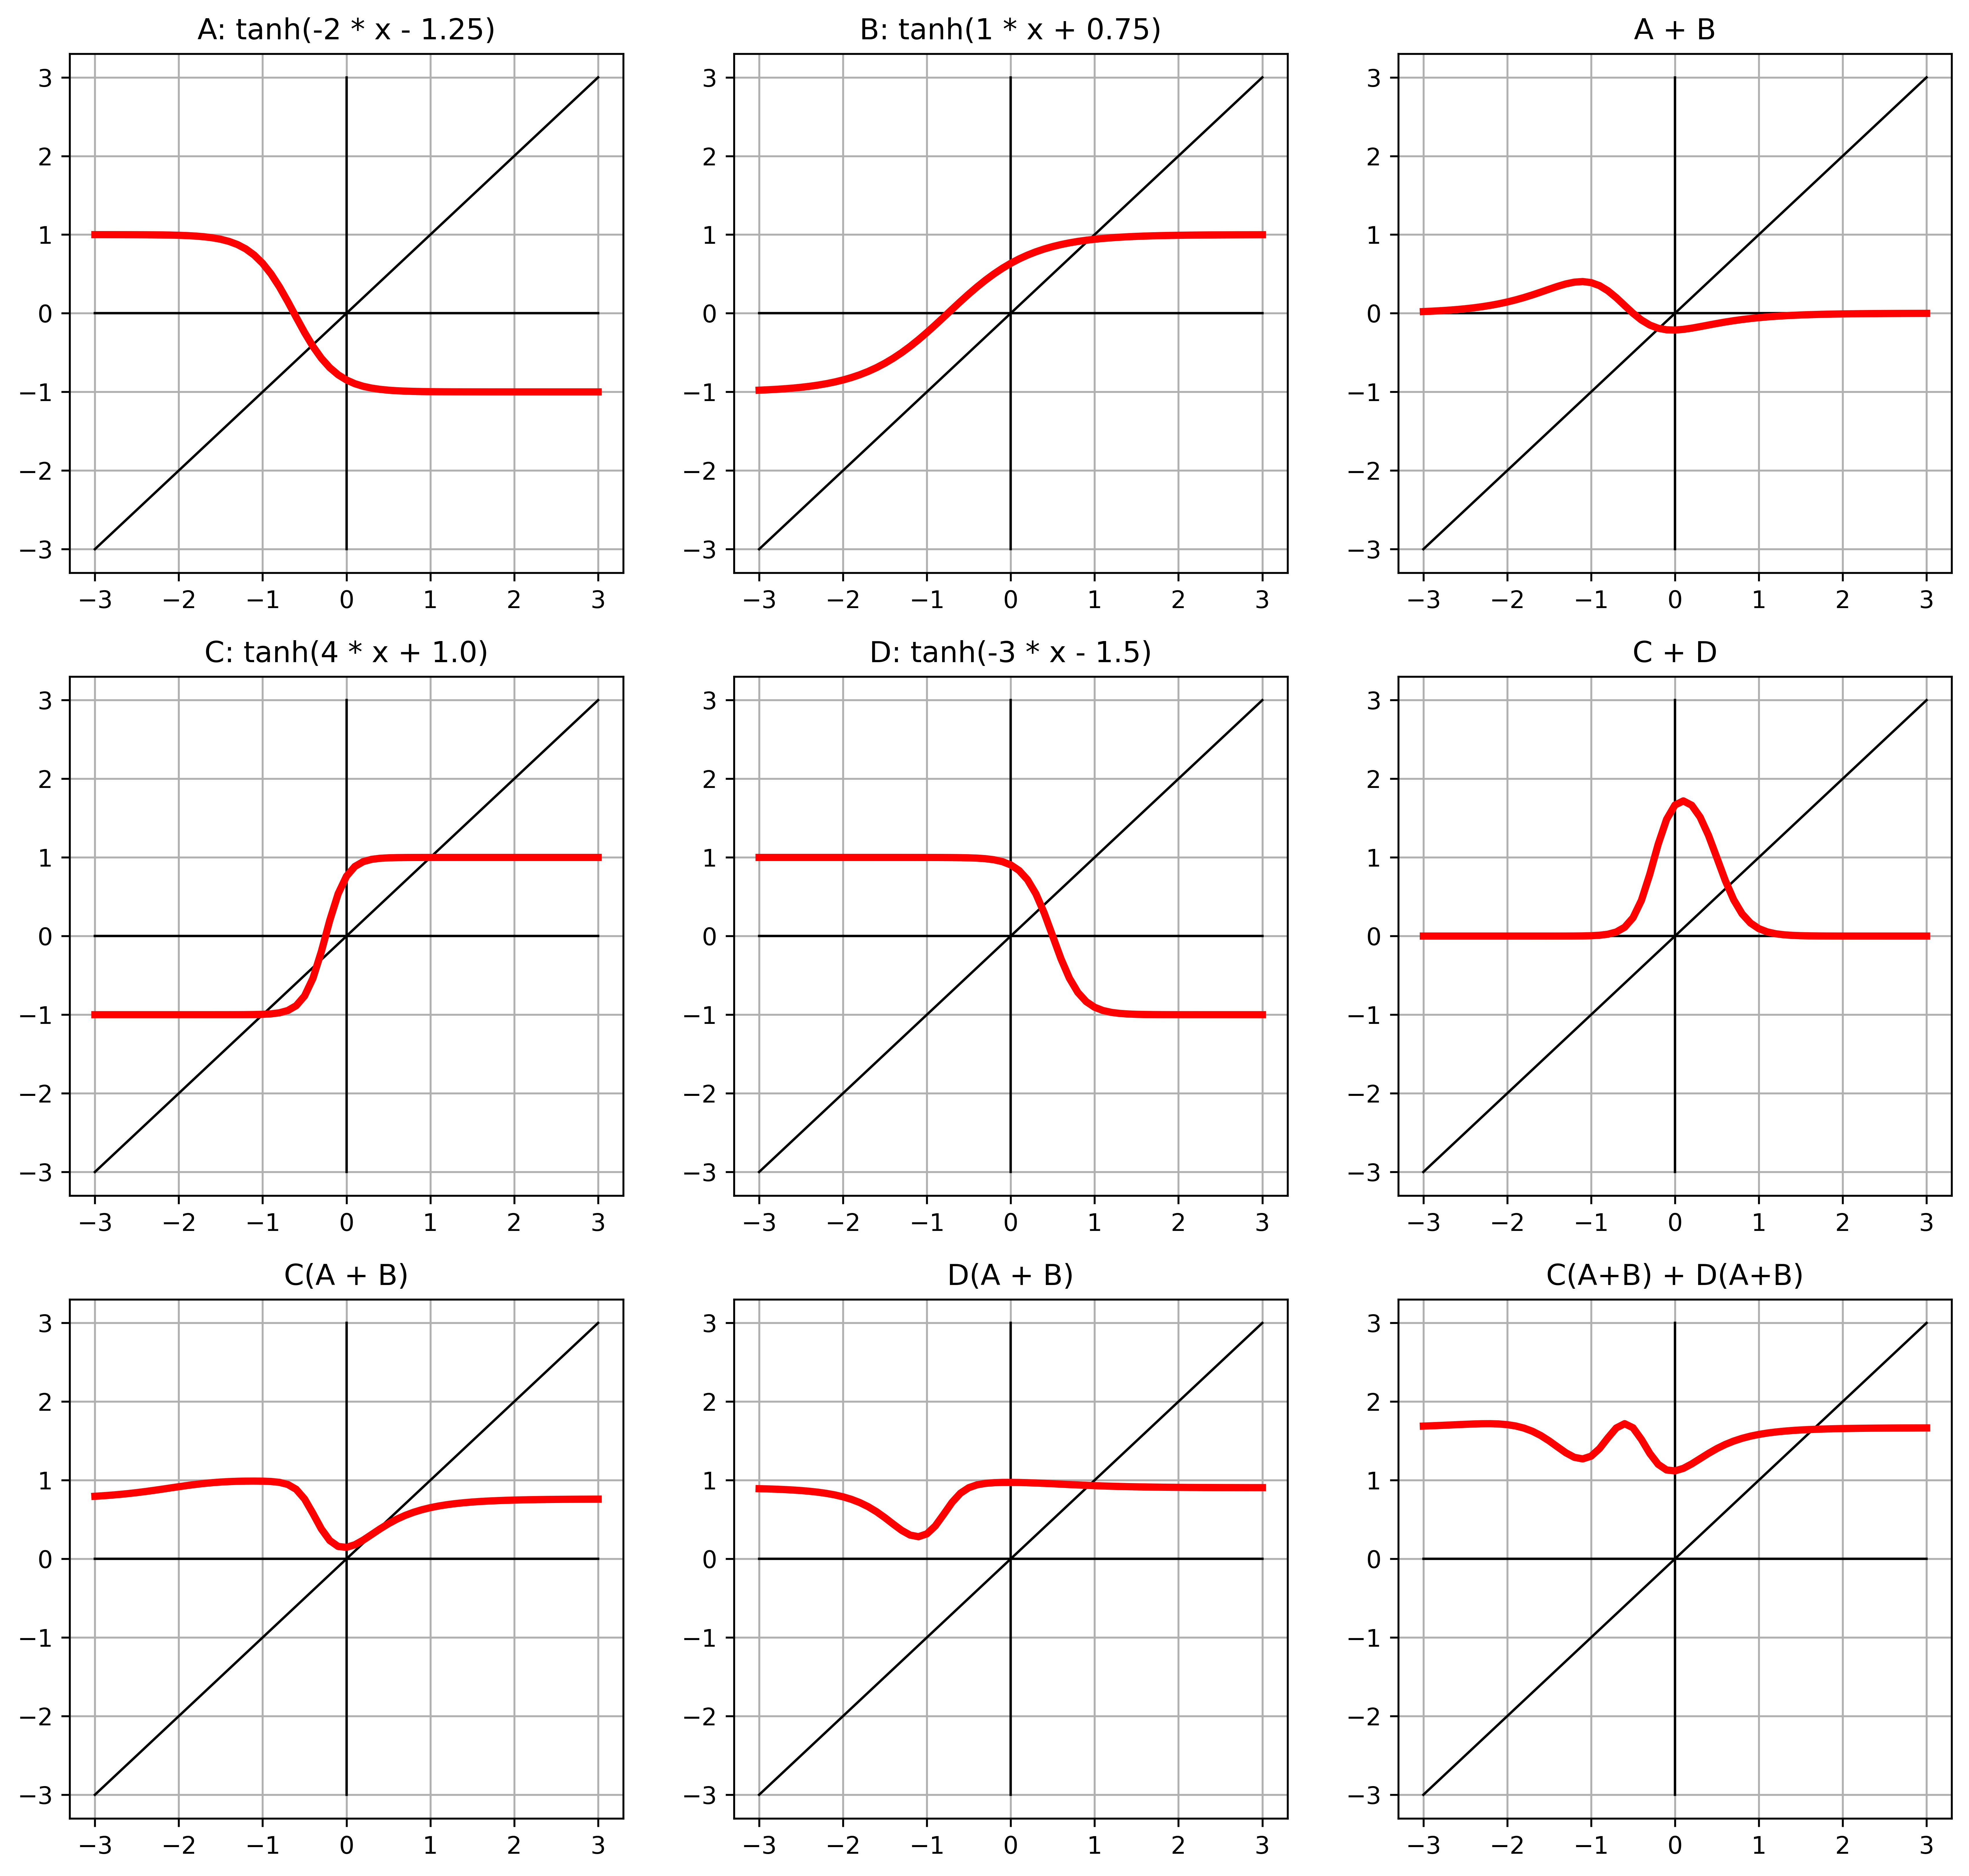

In [7]:
a = lambda x: nn.Tanh()(-2 * x - 1.25)
b = lambda x: nn.Tanh()( 1 * x + 0.75)
c = lambda x: nn.Tanh()( 4 * x + 1.)
d = lambda x: nn.Tanh()(-3 * x + 1.5)

wb_list = [
    ('A: tanh(-2 * x - 1.25)', a(input_t)),
    ('B: tanh(1 * x + 0.75)', b(input_t)),
    ('A + B', a(input_t) + b(input_t)),

    ('C: tanh(4 * x + 1.0)', c(input_t)),
    ('D: tanh(-3 * x - 1.5)', d(input_t)),
    ('C + D', c(input_t) + d(input_t)),

    ('C(A + B)', c(a(input_t) + b(input_t))),
    ('D(A + B)', d(a(input_t) + b(input_t))),
     
    ('C(A+B) + D(A+B)', 
     c(a(input_t) + b(input_t)) + d(a(input_t) + b(input_t))),
]

fig = plt.figure(figsize=(14, 42), dpi=600)

for i, (title_str, output_t) in enumerate(wb_list):
    subplot = fig.add_subplot(len(wb_list), 3, i+1)
    subplot.set_title(title_str)
    
    plt.grid()
    plt.plot(input_t.numpy(), input_t.numpy(),'k', linewidth=1)
    plt.plot([-3,3], [0,0], 'k', linewidth=1)
    plt.plot([0,0], [-3,3], 'k', linewidth=1)
    plt.plot(input_t.numpy(), output_t.numpy(), 'r', linewidth=3)

output_t

tensor([-0.9951, -0.9940, -0.9926, -0.9910, -0.9890, -0.9866, -0.9837,
        -0.9801, -0.9757, -0.9705, -0.9640, -0.9562, -0.9468, -0.9354,
        -0.9217, -0.9051, -0.8854, -0.8617, -0.8337, -0.8005, -0.7616,
        -0.7163, -0.6640, -0.6044, -0.5370, -0.4621, -0.3799, -0.2913,
        -0.1974, -0.0997,  0.0000,  0.0997,  0.1974,  0.2913,  0.3799,
         0.4621,  0.5370,  0.6044,  0.6640,  0.7163,  0.7616,  0.8005,
         0.8337,  0.8617,  0.8854,  0.9051,  0.9217,  0.9354,  0.9468,
         0.9562,  0.9640,  0.9705,  0.9757,  0.9801,  0.9837,  0.9866,
         0.9890,  0.9910,  0.9926,  0.9940,  0.9951])

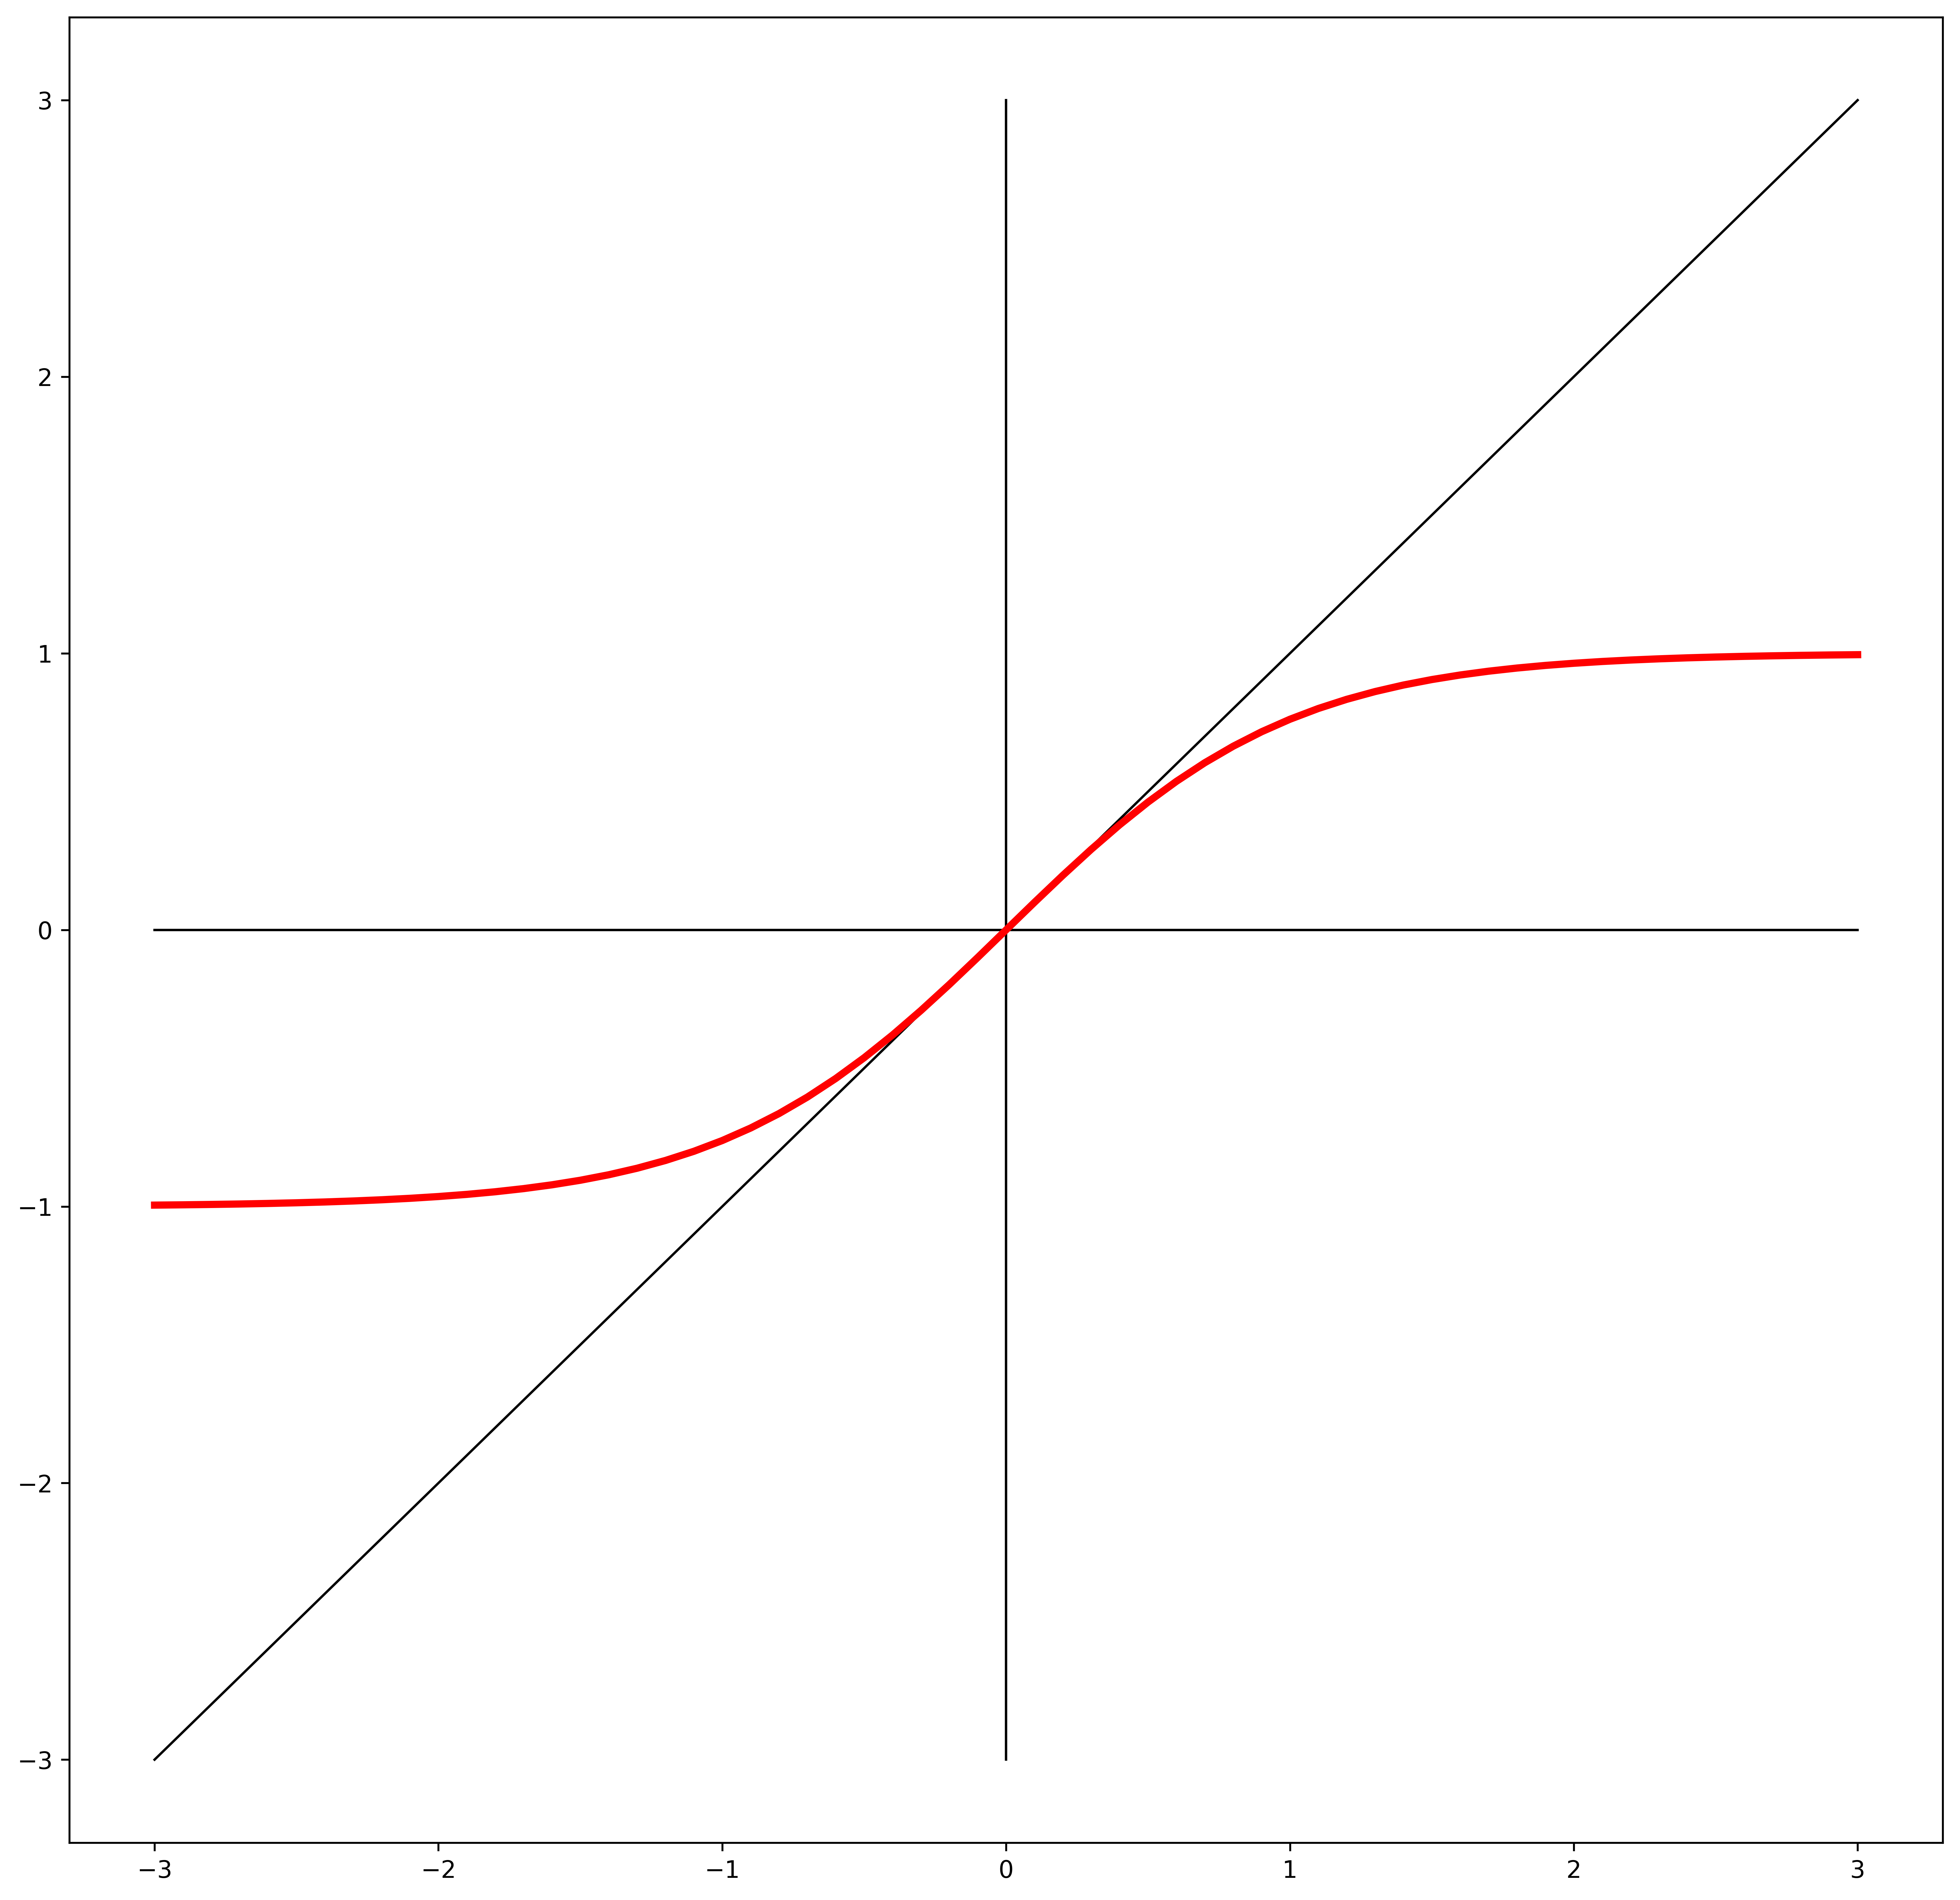

In [8]:
fig = plt.figure(figsize=(14, 14), dpi=600)

subplot = fig.add_subplot(1, 1, 1)
#subplot.set_title(type(activation_func).__name__)

output_t = nn.Tanh()(input_t)

#plt.grid()
plt.plot(input_t.numpy(), input_t.numpy(),'k', linewidth=1)
plt.plot([-3,3], [0,0], 'k', linewidth=1)
plt.plot([0,0], [-3,3], 'k', linewidth=1)
plt.plot(input_t.numpy(), output_t.numpy(), 'r', linewidth=3)

output_t